# Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is defined as the cosine of the angle between them, which is also the inner product of the normalized vectors. This metric is particularly useful in high-dimensional positive spaces where the Euclidean distance may not be meaningful due to the "curse of dimensionality."


## Definition and Concept

Cosine similarity measures the cosine of the angle between two vectors. It is calculated using the dot product of the two vectors divided by the product of their magnitudes (Euclidean norms).

For two vectors A and B, the cosine similarity is defined as:

$$\text{cosine similarity} = \cos(\theta) = \frac{A \cdot B}{||A|| \cdot ||B||} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}$$

Where:
- A·B is the dot product of vectors A and B
- ||A|| and ||B|| are the Euclidean norms (magnitudes) of vectors A and B
- θ is the angle between vectors A and B

The cosine similarity ranges from -1 to 1:
- 1: Vectors are identical (0° angle)
- 0: Vectors are orthogonal (90° angle)
- -1: Vectors are diametrically opposed (180° angle)

In many applications, particularly in text analysis and information retrieval, we work with non-negative values, so the range is effectively 0 to 1.

### Mathematical Properties

Cosine similarity has several important properties:
1. It measures orientation, not magnitude: Two vectors with the same orientation have a cosine similarity of 1, regardless of their magnitudes
2. It is invariant to scaling: Multiplying either vector by a non-zero scalar doesn't change the similarity
3. It is not a proper distance metric as it doesn't satisfy the triangle inequality
4. For normalized vectors (unit vectors), cosine similarity is equivalent to the dot product


In [8]:
# Basic implementation of cosine similarity
import numpy as np
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    """
    Calculate the cosine similarity between two vectors.

    Parameters:
    -----------
    vec1, vec2 : array-like
        The vectors to compare

    Returns:
    --------
    float
        The cosine similarity (between -1 and 1)
    """
    # Convert inputs to numpy arrays
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)

    # Calculate dot product
    dot_product = np.dot(vec1, vec2)

    # Calculate magnitudes
    magnitude1 = norm(vec1)
    magnitude2 = norm(vec2)

    # Avoid division by zero
    if magnitude1 == 0 or magnitude2 == 0:
        return 0

    # Calculate cosine similarity
    return dot_product / (magnitude1 * magnitude2)

# Example usage
examples = [
    ([1, 2, 3], [4, 5, 6]),               # Similar direction
    ([1, 0, 0], [0, 1, 0]),               # Orthogonal (perpendicular)
    ([1, 2, 3], [-1, -2, -3]),            # Opposite direction
    ([0.5, 1.0, 1.5], [1, 2, 3]),         # Same direction, different magnitude
    ([3, 4, 0, 0], [0, 0, 6, 8])          # Vectors with zeros
]

for vec1, vec2 in examples:
    similarity = cosine_similarity(vec1, vec2)
    angle_radians = np.arccos(np.clip(similarity, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)

    print(f"Vectors: {vec1} and {vec2}")
    print(f"Cosine Similarity: {similarity:.4f}")
    print(f"Angle between vectors: {angle_degrees:.2f} degrees\n")


Vectors: [1, 2, 3] and [4, 5, 6]
Cosine Similarity: 0.9746
Angle between vectors: 12.93 degrees

Vectors: [1, 0, 0] and [0, 1, 0]
Cosine Similarity: 0.0000
Angle between vectors: 90.00 degrees

Vectors: [1, 2, 3] and [-1, -2, -3]
Cosine Similarity: -1.0000
Angle between vectors: 180.00 degrees

Vectors: [0.5, 1.0, 1.5] and [1, 2, 3]
Cosine Similarity: 1.0000
Angle between vectors: 0.00 degrees

Vectors: [3, 4, 0, 0] and [0, 0, 6, 8]
Cosine Similarity: 0.0000
Angle between vectors: 90.00 degrees



## Visualizing Cosine Similarity

To better understand cosine similarity, let's visualize it in 2D and 3D spaces:


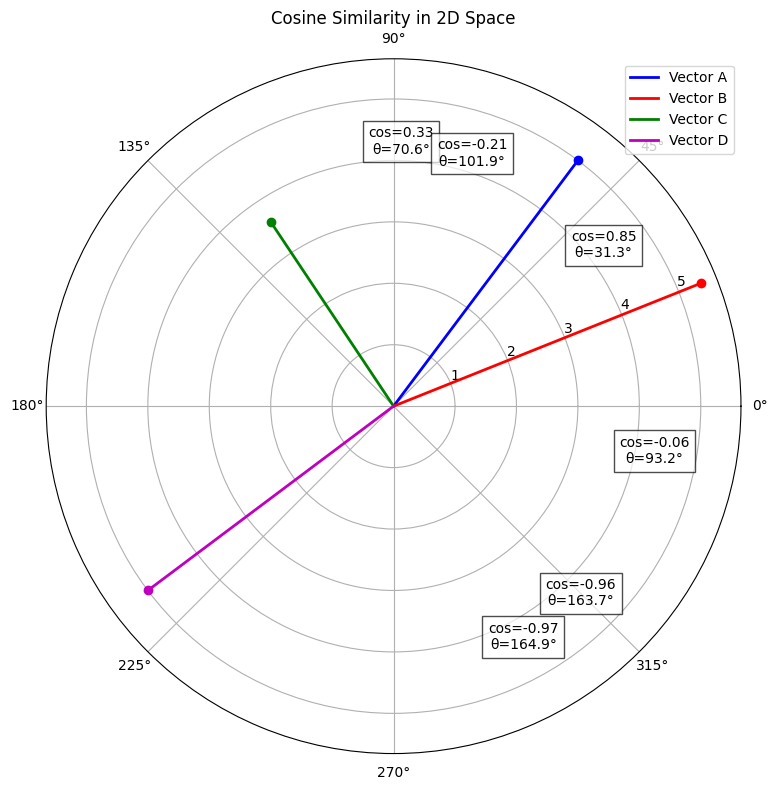

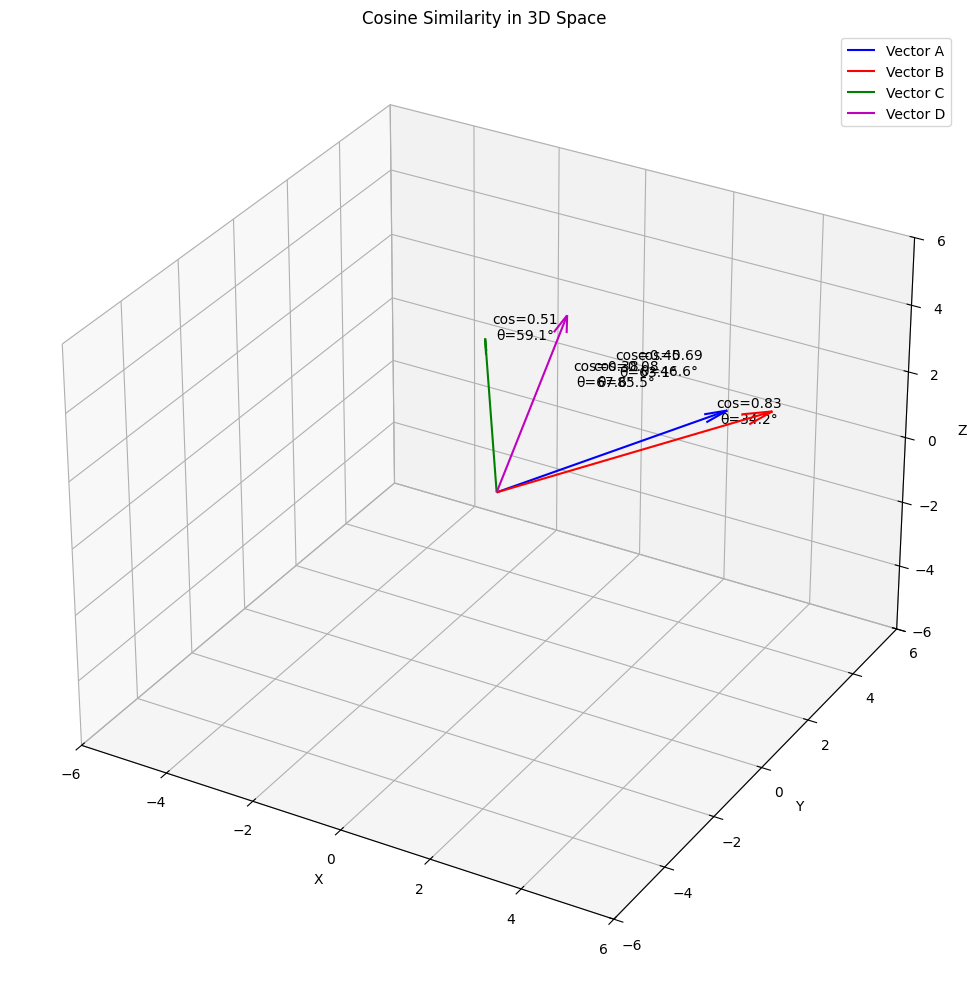

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_vectors_2d(vectors, labels=None, colors=None, title="Vector Visualization in 2D"):
    """
    Plot vectors in 2D space and show the angles between them.

    Parameters:
    -----------
    vectors : list of array-like
        List of 2D vectors to plot
    labels : list of str, optional
        Labels for the vectors
    colors : list of str, optional
        Colors for the vectors
    title : str, optional
        Plot title
    """
    if labels is None:
        labels = [f"Vector {i+1}" for i in range(len(vectors))]

    if colors is None:
        colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, projection='polar')

    # Find the maximum magnitude for scaling
    max_magnitude = max(norm(v) for v in vectors)

    # Plot each vector
    for i, vec in enumerate(vectors):
        magnitude = norm(vec)
        angle = np.arctan2(vec[1], vec[0])

        # Plot the vector
        ax.plot([0, angle], [0, magnitude], colors[i % len(colors)], linewidth=2, label=labels[i])

        # Add arrowhead
        ax.plot(angle, magnitude, colors[i % len(colors)] + 'o')

    # Calculate and display cosine similarities
    n = len(vectors)
    for i in range(n):
        for j in range(i+1, n):
            sim = cosine_similarity(vectors[i], vectors[j])
            angle_deg = np.degrees(np.arccos(np.clip(sim, -1.0, 1.0)))

            # Calculate the midpoint angle for text placement
            angle_i = np.arctan2(vectors[i][1], vectors[i][0])
            angle_j = np.arctan2(vectors[j][1], vectors[j][0])
            mid_angle = (angle_i + angle_j) / 2

            # Add similarity text
            ax.text(mid_angle, max_magnitude * 0.8, 
                   f"cos={sim:.2f}\nθ={angle_deg:.1f}°", 
                   ha='center', va='center', 
                   bbox=dict(facecolor='white', alpha=0.7))

    ax.set_title(title)
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_vectors_3d(vectors, labels=None, colors=None, title="Vector Visualization in 3D"):
    """
    Plot vectors in 3D space.

    Parameters:
    -----------
    vectors : list of array-like
        List of 3D vectors to plot
    labels : list of str, optional
        Labels for the vectors
    colors : list of str, optional
        Colors for the vectors
    title : str, optional
        Plot title
    """
    if labels is None:
        labels = [f"Vector {i+1}" for i in range(len(vectors))]

    if colors is None:
        colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each vector
    for i, vec in enumerate(vectors):
        # Plot the vector from origin
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], 
                 color=colors[i % len(colors)], 
                 arrow_length_ratio=0.1, 
                 label=labels[i])

    # Calculate and display cosine similarities
    n = len(vectors)
    for i in range(n):
        for j in range(i+1, n):
            sim = cosine_similarity(vectors[i], vectors[j])
            angle_deg = np.degrees(np.arccos(np.clip(sim, -1.0, 1.0)))

            # Calculate the midpoint for text placement
            mid_point = [(vectors[i][k] + vectors[j][k])/2 for k in range(3)]

            # Add similarity text
            ax.text(mid_point[0], mid_point[1], mid_point[2], 
                   f"cos={sim:.2f}\nθ={angle_deg:.1f}°", 
                   ha='center', va='center')

    # Set equal aspect ratio
    max_range = max([max(abs(np.array(v))) for v in vectors]) * 1.2
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example 2D vectors
vectors_2d = [
    [3, 4],      # Vector 1
    [5, 2],      # Vector 2
    [-2, 3],     # Vector 3
    [-4, -3]     # Vector 4
]

labels_2d = ["Vector A", "Vector B", "Vector C", "Vector D"]
colors_2d = ['b', 'r', 'g', 'm']

# Plot 2D vectors
plot_vectors_2d(vectors_2d, labels_2d, colors_2d, "Cosine Similarity in 2D Space")

# Example 3D vectors
vectors_3d = [
    [3, 4, 1],      # Vector 1
    [5, 2, 3],      # Vector 2
    [-2, 3, 2],     # Vector 3
    [1, 1, 5]       # Vector 4
]

labels_3d = ["Vector A", "Vector B", "Vector C", "Vector D"]
colors_3d = ['b', 'r', 'g', 'm']

# Plot 3D vectors
plot_vectors_3d(vectors_3d, labels_3d, colors_3d, "Cosine Similarity in 3D Space")


## Cosine Similarity for Text Documents

One of the most common applications of cosine similarity is in text analysis and information retrieval. Let's implement a text-based cosine similarity using the bag-of-words model and TF-IDF weighting:


Document Similarity Matrix (Bag-of-Words):
Doc 1 and Doc 1: 1.0000
Doc 1 and Doc 2: 0.7746
Doc 1 and Doc 3: 0.0913
Doc 1 and Doc 4: 0.0000
Doc 1 and Doc 5: 0.6025

Doc 2 and Doc 1: 0.7746
Doc 2 and Doc 2: 1.0000
Doc 2 and Doc 3: 0.1179
Doc 2 and Doc 4: 0.0000
Doc 2 and Doc 5: 0.4444

Doc 3 and Doc 1: 0.0913
Doc 3 and Doc 2: 0.1179
Doc 3 and Doc 3: 1.0000
Doc 3 and Doc 4: 0.1336
Doc 3 and Doc 5: 0.1179

Doc 4 and Doc 1: 0.0000
Doc 4 and Doc 2: 0.0000
Doc 4 and Doc 3: 0.1336
Doc 4 and Doc 4: 1.0000
Doc 4 and Doc 5: 0.0000

Doc 5 and Doc 1: 0.6025
Doc 5 and Doc 2: 0.4444
Doc 5 and Doc 3: 0.1179
Doc 5 and Doc 4: 0.0000
Doc 5 and Doc 5: 1.0000

Document Similarity Matrix (TF-IDF):
Doc 1 and Doc 1: 1.0000
Doc 1 and Doc 2: 0.6751
Doc 1 and Doc 3: 0.0426
Doc 1 and Doc 4: 0.0000
Doc 1 and Doc 5: 0.4530

Doc 2 and Doc 1: 0.6751
Doc 2 and Doc 2: 1.0000
Doc 2 and Doc 3: 0.0507
Doc 2 and Doc 4: 0.0000
Doc 2 and Doc 5: 0.2793

Doc 3 and Doc 1: 0.0426
Doc 3 and Doc 2: 0.0507
Doc 3 and Doc 3: 1.0000
D

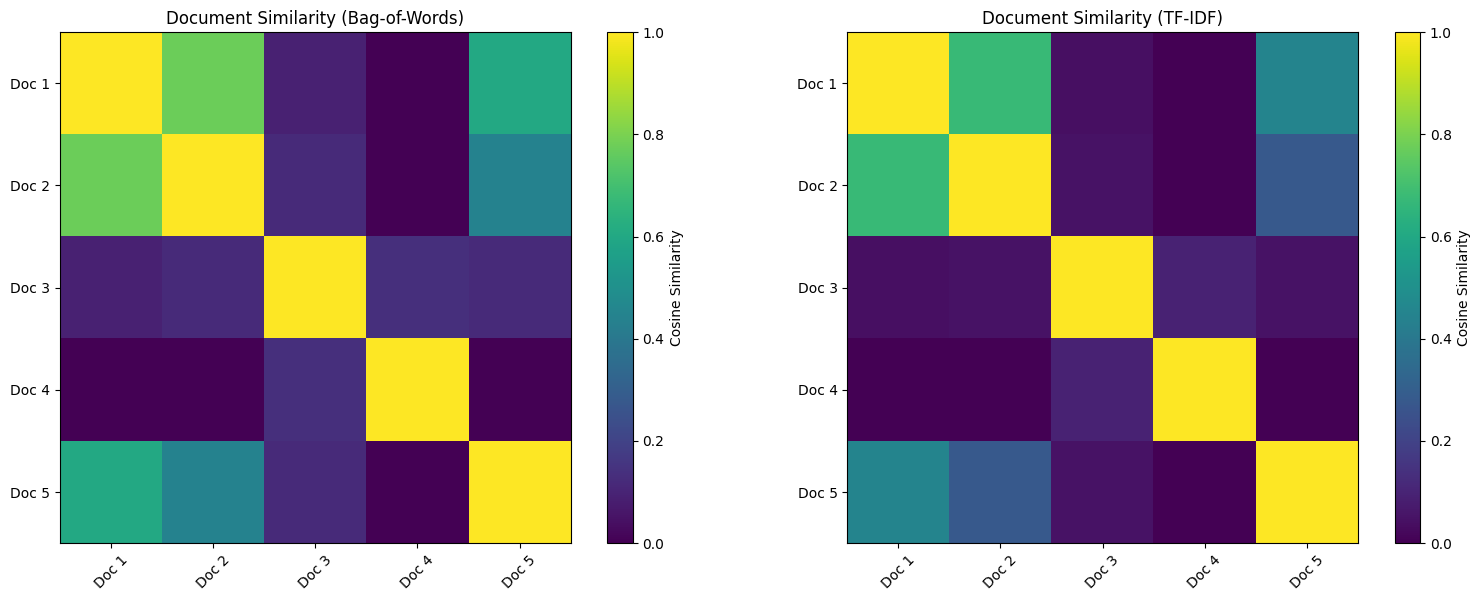

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine_similarity

def text_cosine_similarity(docs, method='count'):
    """
    Calculate cosine similarity between text documents.

    Parameters:
    -----------
    docs : list of str
        List of text documents
    method : str
        Vectorization method: 'count' for bag-of-words, 'tfidf' for TF-IDF

    Returns:
    --------
    numpy.ndarray
        Cosine similarity matrix
    """
    if method == 'count':
        # Create a bag-of-words representation
        vectorizer = CountVectorizer()
    elif method == 'tfidf':
        # Create a TF-IDF representation
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Method must be 'count' or 'tfidf'")

    # Transform documents to vectors
    vectors = vectorizer.fit_transform(docs)

    # Calculate cosine similarity matrix
    similarity_matrix = sklearn_cosine_similarity(vectors)

    return similarity_matrix, vectorizer

# Example documents
documents = [
    "Cosine similarity measures the cosine of the angle between two vectors",
    "The angle between two vectors determines their cosine similarity",
    "Machine learning uses various similarity metrics for clustering",
    "Clustering algorithms group similar data points together",
    "Vectors in the same direction have a cosine similarity of 1"
]

# Calculate similarity with bag-of-words
bow_sim_matrix, bow_vectorizer = text_cosine_similarity(documents, 'count')

# Calculate similarity with TF-IDF
tfidf_sim_matrix, tfidf_vectorizer = text_cosine_similarity(documents, 'tfidf')

# Display results
print("Document Similarity Matrix (Bag-of-Words):")
for i in range(len(documents)):
    for j in range(len(documents)):
        print(f"Doc {i+1} and Doc {j+1}: {bow_sim_matrix[i, j]:.4f}")
    print()

print("Document Similarity Matrix (TF-IDF):")
for i in range(len(documents)):
    for j in range(len(documents)):
        print(f"Doc {i+1} and Doc {j+1}: {tfidf_sim_matrix[i, j]:.4f}")
    print()

# Visualize the similarity matrices as heatmaps
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(bow_sim_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Document Similarity (Bag-of-Words)')
plt.xticks(range(len(documents)), [f'Doc {i+1}' for i in range(len(documents))], rotation=45)
plt.yticks(range(len(documents)), [f'Doc {i+1}' for i in range(len(documents))])

plt.subplot(1, 2, 2)
plt.imshow(tfidf_sim_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Document Similarity (TF-IDF)')
plt.xticks(range(len(documents)), [f'Doc {i+1}' for i in range(len(documents))], rotation=45)
plt.yticks(range(len(documents)), [f'Doc {i+1}' for i in range(len(documents))])

plt.tight_layout()
plt.show()


## Applications of Cosine Similarity

Cosine similarity has numerous applications across various domains:

### 1. Information Retrieval and Text Mining

In search engines and document retrieval systems, cosine similarity helps find relevant documents based on query terms:


In [11]:
def search_documents(query, documents, top_n=3):
    """
    Search for documents similar to a query using cosine similarity.

    Parameters:
    -----------
    query : str
        The search query
    documents : list of str
        The document collection
    top_n : int
        Number of top results to return

    Returns:
    --------
    list
        Top matching documents with similarity scores
    """
    # Combine query and documents
    all_texts = [query] + documents

    # Calculate TF-IDF vectors and similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    # Get the query vector (first row) and document vectors
    query_vector = tfidf_matrix[0:1]
    document_vectors = tfidf_matrix[1:]

    # Calculate similarities between query and each document
    similarities = sklearn_cosine_similarity(query_vector, document_vectors)[0]

    # Create a list of (document, similarity) pairs
    results = [(documents[i], similarities[i]) for i in range(len(documents))]

    # Sort by similarity (descending) and take top_n
    results.sort(key=lambda x: x[1], reverse=True)
    return results[:top_n]

# Example document collection
document_collection = [
    "Cosine similarity is used in text mining and information retrieval.",
    "Vector space models represent documents as vectors in high-dimensional space.",
    "Machine learning algorithms can classify documents based on their content.",
    "Natural language processing techniques help computers understand human language.",
    "Information retrieval systems use similarity measures to rank search results.",
    "Document clustering groups similar documents together based on their content.",
    "Text classification assigns predefined categories to text documents.",
    "Semantic analysis aims to understand the meaning of text beyond keywords."
]

# Example queries
queries = [
    "How does cosine similarity work in information retrieval?",
    "Machine learning for document classification",
    "Clustering similar documents together"
]

# Search for each query
print("Document Search Results:")
for query in queries:
    print(f"\nQuery: '{query}'")
    results = search_documents(query, document_collection)
    for i, (doc, score) in enumerate(results):
        print(f"  {i+1}. {doc} (similarity: {score:.4f})")


Document Search Results:

Query: 'How does cosine similarity work in information retrieval?'
  1. Cosine similarity is used in text mining and information retrieval. (similarity: 0.4352)
  2. Information retrieval systems use similarity measures to rank search results. (similarity: 0.2338)
  3. Vector space models represent documents as vectors in high-dimensional space. (similarity: 0.0644)

Query: 'Machine learning for document classification'
  1. Machine learning algorithms can classify documents based on their content. (similarity: 0.2619)
  2. Text classification assigns predefined categories to text documents. (similarity: 0.1390)
  3. Document clustering groups similar documents together based on their content. (similarity: 0.1286)

Query: 'Clustering similar documents together'
  1. Document clustering groups similar documents together based on their content. (similarity: 0.5812)
  2. Text classification assigns predefined categories to text documents. (similarity: 0.0803)
  3

### 2. Recommendation Systems

Cosine similarity is widely used in recommendation systems to find similar items or users:


In [12]:
def recommend_items(user_ratings, item_similarity_matrix, user_id, top_n=3):
    """
    Recommend items to a user based on item similarity.

    Parameters:
    -----------
    user_ratings : dict
        Dictionary mapping user IDs to their item ratings
    item_similarity_matrix : numpy.ndarray
        Item-item similarity matrix
    user_id : int
        The user to recommend items for
    top_n : int
        Number of recommendations to return

    Returns:
    --------
    list
        Top recommended items with predicted ratings
    """
    # Get the items the user has already rated
    user_items = set(user_ratings[user_id].keys())

    # Get all items
    all_items = set()
    for user in user_ratings:
        all_items.update(user_ratings[user].keys())

    # Find items the user hasn't rated yet
    unrated_items = all_items - user_items

    # Calculate predicted ratings for unrated items
    predictions = []

    for item in unrated_items:
        weighted_sum = 0
        similarity_sum = 0

        # For each item the user has rated
        for rated_item, rating in user_ratings[user_id].items():
            # Get the similarity between the rated item and the unrated item
            similarity = item_similarity_matrix[rated_item][item]

            # Add to the weighted sum
            weighted_sum += similarity * rating
            similarity_sum += abs(similarity)

        # Calculate the predicted rating
        if similarity_sum > 0:
            predicted_rating = weighted_sum / similarity_sum
            predictions.append((item, predicted_rating))

    # Sort by predicted rating (descending) and take top_n
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:top_n]

# Example user-item ratings (user_id -> {item_id: rating})
user_ratings = {
    0: {0: 5, 1: 4, 2: 0, 3: 0, 4: 5, 5: 0},
    1: {0: 0, 1: 0, 2: 5, 3: 4, 4: 0, 5: 0},
    2: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 5},
    3: {0: 4, 1: 5, 2: 0, 3: 0, 4: 4, 5: 0}
}

# Item names for better readability
item_names = {
    0: "The Shawshank Redemption",
    1: "The Godfather",
    2: "Pulp Fiction",
    3: "The Dark Knight",
    4: "Fight Club",
    5: "Inception"
}

# Create item-item similarity matrix based on user ratings
# First, create an item-user matrix
item_user_matrix = np.zeros((len(item_names), len(user_ratings)))
for user_id, items in user_ratings.items():
    for item_id, rating in items.items():
        item_user_matrix[item_id, user_id] = rating

# Calculate item-item similarity matrix
item_similarity_matrix = np.zeros((len(item_names), len(item_names)))
for i in range(len(item_names)):
    for j in range(len(item_names)):
        if i != j:
            item_similarity_matrix[i, j] = cosine_similarity(
                item_user_matrix[i], item_user_matrix[j])

# Get recommendations for each user
print("Movie Recommendations:")
for user_id in user_ratings:
    print(f"\nUser {user_id} has rated:")
    for item_id, rating in user_ratings[user_id].items():
        if rating > 0:
            print(f"  {item_names[item_id]}: {rating}/5")

    print(f"Recommendations for User {user_id}:")
    recommendations = recommend_items(user_ratings, item_similarity_matrix, user_id)
    for item_id, predicted_rating in recommendations:
        print(f"  {item_names[item_id]} (predicted rating: {predicted_rating:.2f}/5)")


Movie Recommendations:

User 0 has rated:
  The Shawshank Redemption: 5/5
  The Godfather: 4/5
  Fight Club: 5/5
Recommendations for User 0:

User 1 has rated:
  Pulp Fiction: 5/5
  The Dark Knight: 4/5
Recommendations for User 1:

User 2 has rated:
  The Dark Knight: 5/5
  Inception: 5/5
Recommendations for User 2:

User 3 has rated:
  The Shawshank Redemption: 4/5
  The Godfather: 5/5
  Fight Club: 4/5
Recommendations for User 3:


### 3. Image Similarity and Computer Vision

Cosine similarity can be used to compare image feature vectors:


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
import os

def extract_image_features(image_path, resize=(100, 100), pca_components=50):
    """
    Extract features from an image using PCA.

    Parameters:
    -----------
    image_path : str
        Path to the image file or URL
    resize : tuple
        Size to resize the image to
    pca_components : int
        Number of PCA components to use

    Returns:
    --------
    numpy.ndarray
        Feature vector
    """
    # Load the image
    if image_path.startswith(('http://', 'https://')):
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(image_path)

    # Convert to RGB if needed
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize
    img = img.resize(resize)

    # Convert to numpy array and flatten
    img_array = np.array(img)
    flattened = img_array.reshape(-1)

    # Standardize
    scaler = StandardScaler()
    scaled = scaler.fit_transform(flattened.reshape(1, -1))

    # Apply PCA if needed
    if pca_components and pca_components < len(flattened):
        pca = PCA(n_components=pca_components)
        features = pca.fit_transform(scaled)[0]
    else:
        features = scaled[0]

    return features

def compare_images(image_paths, titles=None):
    """
    Compare multiple images using cosine similarity.

    Parameters:
    -----------
    image_paths : list of str
        Paths to the images
    titles : list of str, optional
        Titles for the images

    Returns:
    --------
    numpy.ndarray
        Similarity matrix
    """
    if titles is None:
        titles = [f"Image {i+1}" for i in range(len(image_paths))]

    # Extract features for each image
    features = []
    for path in image_paths:
        try:
            feature = extract_image_features(path)
            features.append(feature)
        except Exception as e:
            print(f"Error processing {path}: {e}")
            return None

    # Calculate similarity matrix
    n = len(features)
    similarity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            similarity_matrix[i, j] = cosine_similarity(features[i], features[j])

    # Display images and similarity matrix
    fig = plt.figure(figsize=(15, 10))

    # Plot images
    for i, path in enumerate(image_paths):
        ax = fig.add_subplot(2, n, i+1)
        if path.startswith(('http://', 'https://')):
            response = requests.get(path)
            img = Image.open(BytesIO(response.content))
            ax.imshow(img)
        else:
            img = mpimg.imread(path)
            ax.imshow(img)
        ax.set_title(titles[i])
        ax.axis('off')

    # Plot similarity matrix
    ax = fig.add_subplot(2, 1, 2)
    im = ax.imshow(similarity_matrix, cmap='viridis')
    plt.colorbar(im, label='Cosine Similarity')

    # Add text annotations
    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, f"{similarity_matrix[i, j]:.2f}",
                          ha="center", va="center", color="w")

    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(titles)
    ax.set_yticklabels(titles)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.set_title("Image Similarity Matrix")
    fig.tight_layout()
    plt.show()

    return similarity_matrix

# Example with local images or URLs
# For this example, we'll use URLs to sample images
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/320px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Mount_Everest_as_seen_from_Drukair2_PLW_edit.jpg/320px-Mount_Everest_as_seen_from_Drukair2_PLW_edit.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Sea_Sunset.jpg/320px-Sea_Sunset.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Golden_Gate_Bridge_sunset_1.jpg/320px-Golden_Gate_Bridge_sunset_1.jpg"
]

image_titles = ["Mountain 1", "Mountain 2", "Sunset 1", "Sunset 2"]

# Compare images
try:
    similarity_matrix = compare_images(image_urls, image_titles)
    if similarity_matrix is not None:
        print("Image Similarity Matrix:")
        for i in range(len(image_titles)):
            for j in range(len(image_titles)):
                print(f"{image_titles[i]} vs {image_titles[j]}: {similarity_matrix[i, j]:.4f}")
except Exception as e:
    print(f"Error comparing images: {e}")
    print("Skipping image comparison example.")


Error processing https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/320px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg: cannot identify image file <_io.BytesIO object at 0x703c91f0d210>


## Advantages and Limitations

### Advantages:

1. **Scale Invariance**: Cosine similarity measures the angle between vectors, not their magnitudes, making it invariant to scaling
2. **Effective for High-Dimensional Data**: Works well in high-dimensional spaces where Euclidean distance may not be meaningful
3. **Efficiency**: Can be computed efficiently, especially for sparse vectors
4. **Intuitive Interpretation**: The angle between vectors provides an intuitive measure of orientation similarity
5. **Widely Applicable**: Useful in various domains including text analysis, recommendation systems, and image processing

### Limitations:

1. **Not a True Distance Metric**: Doesn't satisfy the triangle inequality property of distance metrics
2. **Ignores Magnitude**: Only considers orientation, not the magnitude of vectors, which may be important in some applications
3. **Limited to Non-Zero Vectors**: Not defined for zero vectors
4. **Sensitivity to Small Changes**: In high-dimensional spaces, small changes can significantly affect the similarity
5. **Assumes Independence**: Doesn't account for correlations between dimensions


## Comparison with Other Similarity Metrics

Cosine similarity is one of many similarity metrics. Here's how it compares to some others:


Comparison of Similarity Metrics:
                                   Pair    Cosine  Euclidean  Manhattan  \
0                     Similar Direction  0.974632   0.500000   0.500000   
1                            Orthogonal  0.000000   0.183503   0.333333   
2                    Opposite Direction -1.000000  -0.440165  -0.333333   
3  Same Direction (Different Magnitude)  1.000000   0.639959   0.666667   
4                       Partial Overlap  0.816497   0.500000   0.750000   

    Jaccard  
0  1.000000  
1  0.000000  
2  0.000000  
3  1.000000  
4  0.666667  


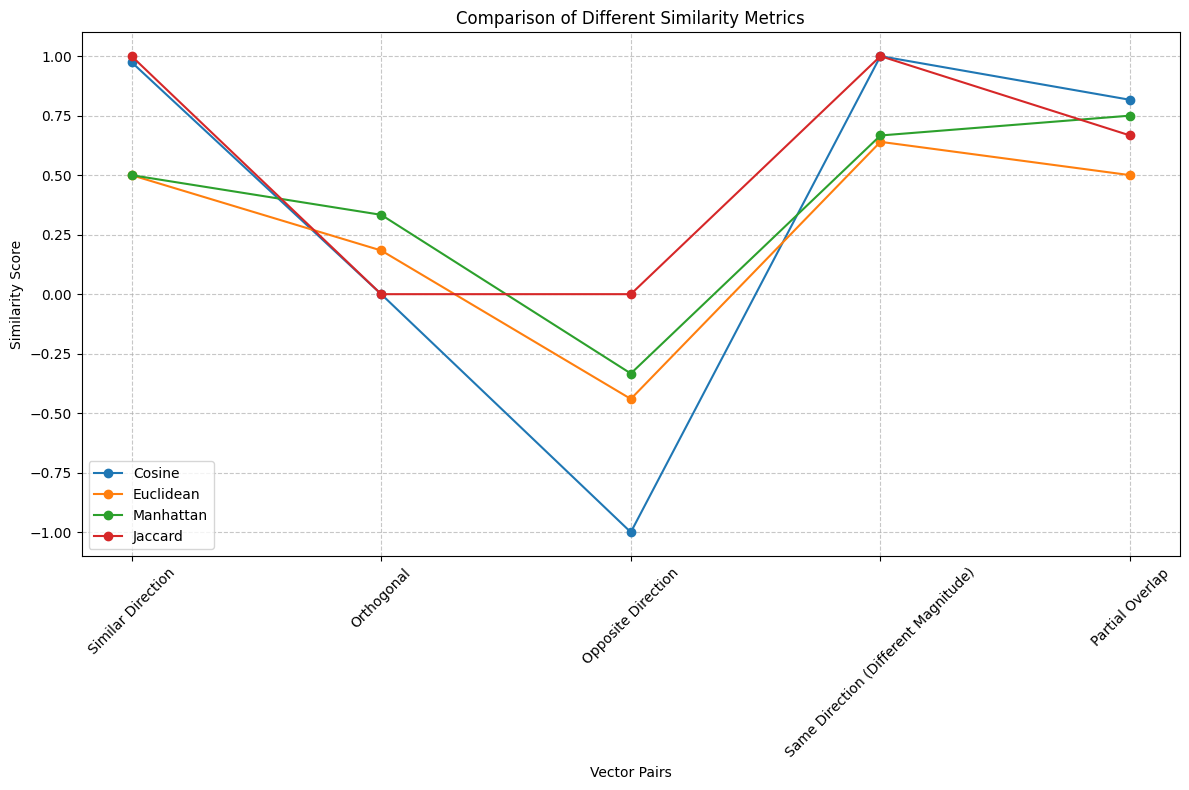

In [14]:
def compare_similarity_metrics(vec_pairs, names=None):
    """
    Compare different similarity metrics on pairs of vectors.

    Parameters:
    -----------
    vec_pairs : list of tuples
        List of (vector1, vector2) pairs
    names : list of str, optional
        Names for the vector pairs

    Returns:
    --------
    pandas.DataFrame
        Comparison of different metrics
    """
    import pandas as pd
    from scipy.spatial.distance import euclidean, cityblock, jaccard

    if names is None:
        names = [f"Pair {i+1}" for i in range(len(vec_pairs))]

    results = []

    for i, (vec1, vec2) in enumerate(vec_pairs):
        # Convert to numpy arrays
        vec1 = np.array(vec1)
        vec2 = np.array(vec2)

        # Calculate various metrics
        cos_sim = cosine_similarity(vec1, vec2)

        # Euclidean distance (converted to similarity)
        eucl_dist = euclidean(vec1, vec2)
        max_dist = euclidean(np.zeros_like(vec1), np.ones_like(vec1) * max(np.max(vec1), np.max(vec2)))
        eucl_sim = 1 - (eucl_dist / max_dist) if max_dist > 0 else 1

        # Manhattan distance (converted to similarity)
        manh_dist = cityblock(vec1, vec2)
        max_manh_dist = cityblock(np.zeros_like(vec1), np.ones_like(vec1) * max(np.max(vec1), np.max(vec2)))
        manh_sim = 1 - (manh_dist / max_manh_dist) if max_manh_dist > 0 else 1

        # Jaccard similarity (for binary vectors)
        # Convert to binary for Jaccard
        bin_vec1 = vec1 > 0
        bin_vec2 = vec2 > 0
        try:
            jac_sim = 1 - jaccard(bin_vec1, bin_vec2)  # jaccard returns distance, convert to similarity
        except:
            jac_sim = np.nan  # In case of error (e.g., all zeros)

        results.append({
            'Pair': names[i],
            'Cosine': cos_sim,
            'Euclidean': eucl_sim,
            'Manhattan': manh_sim,
            'Jaccard': jac_sim
        })

    # Create DataFrame
    df = pd.DataFrame(results)
    return df

# Example vector pairs for comparison
comparison_pairs = [
    ([1, 2, 3], [4, 5, 6]),               # Similar direction
    ([1, 0, 0], [0, 1, 0]),               # Orthogonal
    ([1, 2, 3], [-1, -2, -3]),            # Opposite direction
    ([0.5, 1.0, 1.5], [1, 2, 3]),         # Same direction, different magnitude
    ([1, 1, 0, 0], [1, 1, 1, 0])          # Partial overlap
]

pair_names = [
    "Similar Direction",
    "Orthogonal",
    "Opposite Direction",
    "Same Direction (Different Magnitude)",
    "Partial Overlap"
]

# Compare metrics
comparison_df = compare_similarity_metrics(comparison_pairs, pair_names)
print("Comparison of Similarity Metrics:")
print(comparison_df)

# Visualize the comparison
plt.figure(figsize=(12, 8))
for metric in ['Cosine', 'Euclidean', 'Manhattan', 'Jaccard']:
    plt.plot(comparison_df['Pair'], comparison_df[metric], marker='o', label=metric)

plt.xlabel('Vector Pairs')
plt.ylabel('Similarity Score')
plt.title('Comparison of Different Similarity Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusion

Cosine similarity is a powerful metric for measuring the similarity between vectors based on their orientation rather than magnitude. This property makes it particularly useful in high-dimensional spaces where the curse of dimensionality can make Euclidean distances less meaningful.

Key takeaways:

1. **Angle-Based Measure**: Cosine similarity measures the cosine of the angle between two vectors, ranging from -1 (opposite direction) to 1 (same direction)
2. **Scale Invariance**: It's invariant to scaling, making it useful when the magnitude of vectors is less important than their direction
3. **High-Dimensional Spaces**: Particularly effective in high-dimensional spaces like text document vectors or feature embeddings
4. **Versatile Applications**: Widely used in information retrieval, recommendation systems, text mining, and image analysis
5. **Computational Efficiency**: Can be efficiently computed, especially for sparse vectors common in text analysis

When working with similarity metrics, it's important to choose the right one for your specific application. Cosine similarity excels when the angle between vectors is more important than their magnitude, while other metrics like Euclidean or Manhattan distance may be more appropriate when absolute distances matter.

For text and document similarity, cosine similarity combined with TF-IDF weighting has become a standard approach, as it effectively captures semantic similarity while accounting for term importance. In recommendation systems, it helps identify similar items or users based on their feature vectors or interaction patterns.

As with any metric, understanding its properties and limitations is crucial for applying it effectively to solve real-world problems.
